<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [9]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Visualización Descriptiva



Distribución de datos:



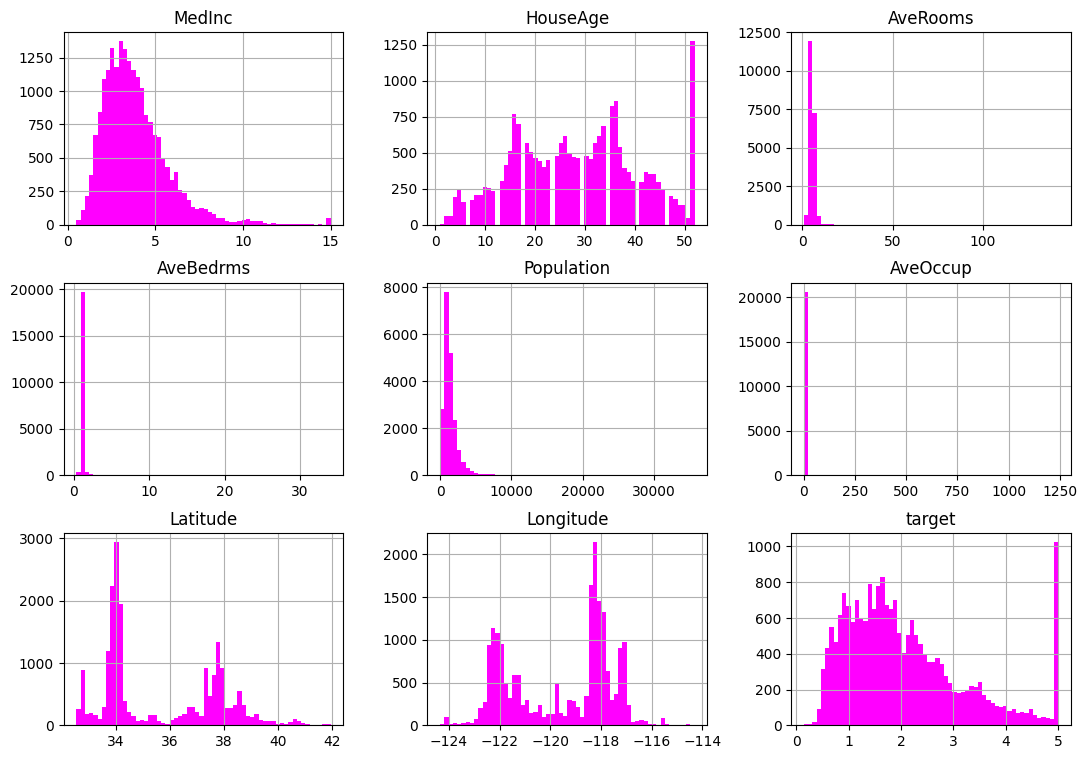

In [13]:
# Visualización de la distribución de los datos
print('Distribución de datos:\n')
housing.hist(bins=60, figsize=(13,9), color='magenta')
plt.show()

A partir de esto observamos outliers, específicamente en AveRooms, AveBedrms, Populatoin y AveOccup. Además en HouseAge y target se observa un peak de densidad en la distribución final.

# Preprocesamiento

In [14]:
# Estandarización
scaler = StandardScaler()
housing_standard = scaler.fit_transform(housing)
housing_standard = pd.DataFrame(housing_standard, columns = housing.columns)

# Separamos las variables
X = housing_standard.drop('target', axis = 1).values
Y = housing['target'].values

# Separamos los datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print('Separando informacion:\n')
print('numero de filas data original : ', len(X))
print('numero de filas train set     : ', len(X_train))
print('numero de filas test set      : ', len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  16512
numero de filas test set      :  4128


Datos después de eliminar outliers:



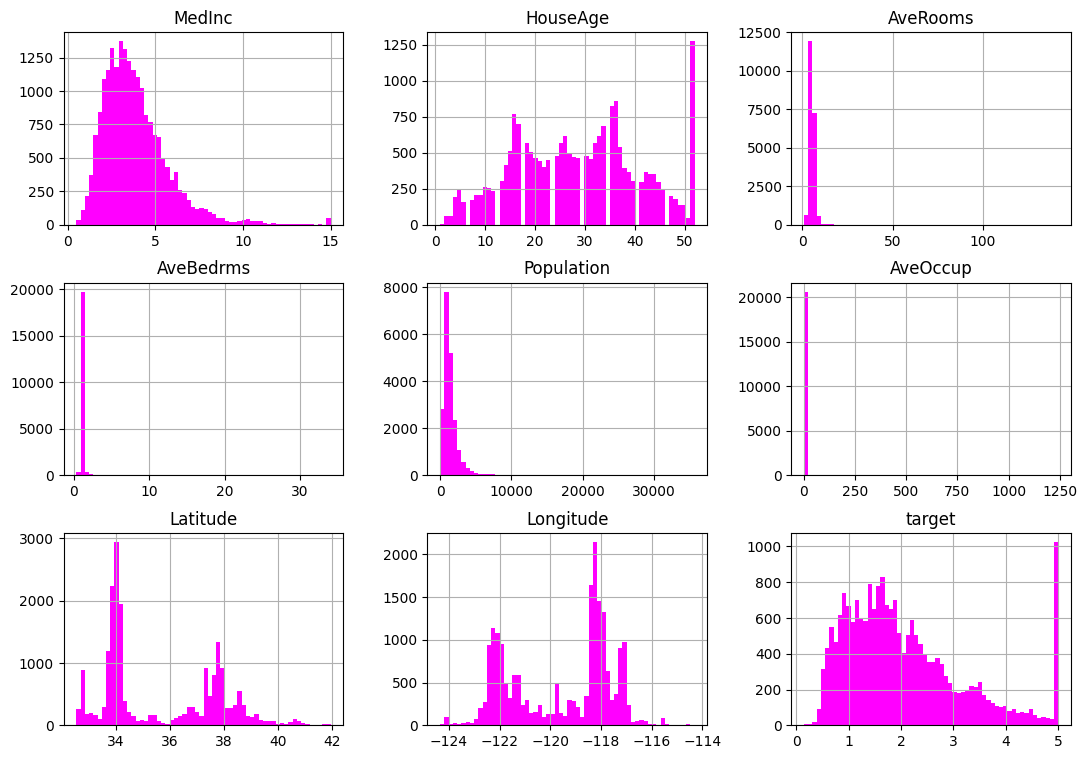

In [16]:
print('Datos después de eliminar outliers:\n')
data = housing
data.hist(bins=60, figsize=(13,9), color='magenta')
plt.show()

# Selección de Modelo

In [29]:
# Regresion Lineal

start = time.time()
LR = LinearRegression()
LR.fit(X_train, Y_train)
end = time.time()
t_LR = end-start

df_LR = pd.DataFrame({'y': Y_test, 'yhat': LR.predict(X_test)})

In [31]:
# Support Vector Machine

start = time.time()
SVM = svm.SVR(kernel='linear')
SVM.fit(X_train, Y_train)
end = time.time()
t_SVM = end-start

df_SVM = pd.DataFrame({'y': Y_test, 'yhat': SVM.predict(X_test)})

In [35]:
# KNearest

start = time.time()
KNR = KNeighborsRegressor()
KNR.fit(X_train, Y_train)
end = time.time()
t_KNR = end-start

df_KNR = pd.DataFrame({'y': Y_test, 'yhat': KNR.predict(X_test)})

In [38]:
# Arbol de decisión

start = time.time()
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, Y_train)
end = time.time()
t_DTree = end-start

df_DTree = pd.DataFrame({'y': Y_test, 'yhat': DTree.predict(X_test)})

# Métricas y análisis de resultados

In [43]:
def metricas(model, df, t):
    df_result = regression_metrics(df).join(pd.DataFrame({'execution_time': t}, index=[0]), how='left')
    display(df_result)

print('Métricas: ')

print('\nRegresion Lineal: ')
metricas(LR, df_LR, t_LR)

print('\nSVM: ')
metricas(SVM, df_SVM, t_SVM)

print('\nKNearestRegression: ')
metricas(KNR, df_KNR, t_KNR)

print('\nÁrbol de decisión: ')
metricas(DTree, df_DTree , t_DTree)

Métricas: 

Regresion Lineal: 


,mae,mse,rmse,mape,smape,execution_time
0,0.5332,0.5559,0.7456,31.9522,0.4843,0.015376



SVM: 


,mae,mse,rmse,mape,smape,execution_time
0,0.512,0.5793,0.7611,28.3874,0.4422,38.803957



KNearestRegression: 


,mae,mse,rmse,mape,smape,execution_time
0,0.4455,0.4338,0.6586,24.6299,0.3952,0.066092



Árbol de decisión: 


,mae,mse,rmse,mape,smape,execution_time
0,0.4538,0.4943,0.703,24.8667,0.3983,0.304093


A partir de los resultados proporcionados observamos que el modelo que posee mejor rendimiento con respecto al MAE y MSE es KNearestRegression. Además, el que consigue mejor rendimiento con respecto de MAPE es el árbol de decisión.